<a href="https://colab.research.google.com/github/zardemostoles/zardemostoles-uoc.edu/blob/master/TFG_Despliegue_Modelo_AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se actualiza SageMaker
!pip install -q --upgrade "sagemaker>=2"

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Módulos necesarios
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt

from sagemaker.tensorflow import TensorFlowModel
from sagemaker.serverless import ServerlessInferenceConfig
from sagemaker import get_execution_role
from sagemaker import Session

In [ ]:
# Se obtienen el role y la sesión
role = get_execution_role()
sess = Session()
bucket = sess.default_bucket()

In [ ]:
# Se crea un módelo a partir del tarball
model = TensorFlowModel(model_data='s3://uoc-tfg/TFG_mejor_modelo.tar.gz', 
                        name='TFG-modelo',
                        framework_version='2.10',
                        role=role)

In [ ]:
# Se configura un serverless endpoint
serverless_config = ServerlessInferenceConfig(
        memory_size_in_mb=4096, 
        max_concurrency=10,
)

In [ ]:
# Se despliega el endpoing con el modelo
predictor = model.deploy(initial_instance_count=1, 
                         endpoint_name="TFG-endpoint",
                         serverless_inference_config=serverless_config)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Using already existing model: TFG-modelo


------!

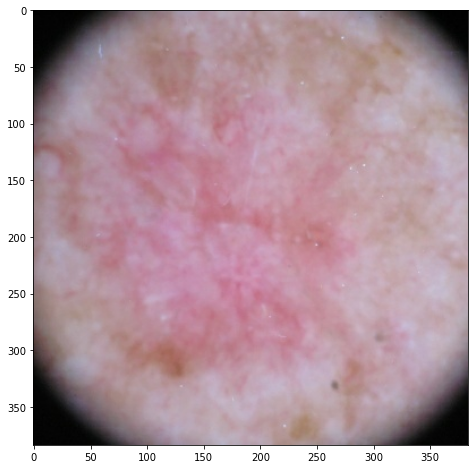

In [ ]:
# Se visualiza una imagen
image_file = "ISIC_0053515.png"
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
image = PIL.Image.open(image_file)
plt.imshow(image)
plt.show()


In [ ]:
# Se realiza predicción de prueba
img = Image.open(image_file).resize((384,384))
image_array = np.array(img)
result = predictor.predict(data=image_array.reshape(1,384,384,3))
print(result)

{'predictions': [[0.00209886883]]}


In [ ]:
# Si se desea elminar el endpoint
#predictor.delete_endpoint()